<a href="https://colab.research.google.com/github/aaronbansal5/PersonalProjects/blob/main/Dog_Breed_Classifier_MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background for Project
The project that I chose to do was creating a classifier that could identify between a 120 different breeds of dogs. I got the idea to make such a project when I was running around the neighborhood and happened to see a dog walking by. Personally I am not much of a dog person so I had no clue what type of dog it was and so I thought why not just create a program that could figure it out for me!

#Imports

In [ ]:
##Importing all the necessary libraries and modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
from zipfile import ZipFile as zp
import os


# Extracting Data from Zip File

In [ ]:
rawExtraction = zp("raw_data.zip") ##puts the zipfile file into a ZipFile Object
os.mkdir("/content/raw") ##Creates a new diretory for where the raw images will be stored
rawDirectory = "/content/raw/rawData" ##Specifies the path to where the images will be stored
rawExtraction.extractall(rawDirectory) ##Extracts all the images to the specified path
rawExtraction.close()

# Exctracting the 120 Different Class Names

In [ ]:
labelsDf = pd.read_csv("raw_labels.csv") ##Exctracts the labels from the csv file
labelsDf = labelsDf.drop(columns="id") ##Drops the unneccesary id coluumn

##Utilizes the pd.get_dummies function to seperate all the different class names
differentDogs = pd.get_dummies(labelsDf)
classNames = [] ##List that will hold our different class names
for i in differentDogs.columns:
  classNames.append(i)

##get_dummies puts the columnn name as a part of each new class created so we have to remove it
classNames = [className.replace("breed_","") for className in classNames]

print(classNames)##See the different class names

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

# Assigning the Labels for the Images

In [ ]:
labels = [] ##New list to temporarily hold our labels before they are added to dataset

labelsList = labelsDf.to_numpy() ##Total list of labels as a numpy array

for element in labelsList: ##Access each element in the array and it would be in the form of the class name
  for index in range(len(classNames)): ##Looping through the different idexes in classNames
    if element[0]==classNames[index]: ##If the element matches the class name we append that index for label
      labels.append(index)



# Loading and Preprocessing the Image

In [ ]:
##Declaring my Image Size(IMG_SIZE x IMG_SIZE)
IMG_SIZE = 128

In [ ]:
##Puts all the Pixel Data within the 0-1 range
def preprocess(image, label):
  return image/255.0,label


##Uses tf.keras.utils.image_dataset_from_directory() in order to make a TF Dataset out of the labels and images I had provided
##I had split my data 90% Train and 10% Test
train_data = tf.keras.utils.image_dataset_from_directory("/content/raw",labels = labels,label_mode='int',color_mode='rgb',batch_size=32,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True,seed=127, validation_split=0.1, subset='training')
test_data = tf.keras.utils.image_dataset_from_directory("/content/raw",labels = labels,label_mode='int',color_mode='rgb',batch_size=32,image_size=(IMG_SIZE,IMG_SIZE),shuffle=True, seed=127, validation_split=0.1, subset='validation')
####Test data has bug because images and labels aren't lining up. Until fixed just upload your own image like done on bottom to test out model

##Uses the map method to map train and test dataset to the preprocess function
train_data = train_data.map(preprocess, tf.data.AUTOTUNE)
test_data = test_data.map(preprocess, tf.data.AUTOTUNE)


Found 10222 files belonging to 1 classes.
Using 9200 files for training.
Found 10222 files belonging to 1 classes.
Using 1022 files for validation.


In [ ]:
##Function I made to convert my TF Dataset(tf.data.Dataset) object into a numpy class
def dataset_to_numpy(dataset):
  counter = 1
  ##Checks if it is the first iteration and then extracts the images and labels and storing it
  for images, labs in dataset.as_numpy_iterator():
    if counter == 1:
      numpy_images = images
      numpy_labels = labs
      counter = 0
    else:
      numpy_images = np.concatenate((numpy_images,images)) ##Appending the numpy array of images
      numpy_labels = np.concatenate((numpy_labels,labs)) ##Appending the numpy array of labels

  return numpy_images,numpy_labels


##Splits the Dataset into the invidiual labels and features for both train and test
X_train,y_train = dataset_to_numpy(train_data)
X_test,y_test = dataset_to_numpy(test_data)

In [ ]:
##View the Type and Shape of the Train Data
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (9200, 128, 128, 3)


# Viewing the spread of the labels
By visualizing how many images we have of each breed of dog we can figure out what augmentations we have to make to level the data out

(array([ 73., 103.,  79.,  96.,  68.,  68.,  93., 103.,  72.,  87.,  77.,
        100.,  68.,  88.,  80.,  73.,  64.,  82.,  66.,  78.,  76.,  70.,
         60.,  57.,  69.,  71.,  98.,  69.,  76.,  65.,  83.,  69.,  65.,
         78.,  65.,  84.,  70.,  74.,  67.,  77.,  76.,  64., 107.,  59.,
         66.,  66.,  63.,  71.,  60.,  61.,  72.,  63.,  99.,  71.,  76.,
         87.,  75.,  71.,  73.,  94.,  86.,  91.,  73.,  79.,  68.,  63.,
         63.,  75.,  91.,  94.,  76.,  67.,  68., 111.,  75.,  88.,  69.,
         72.,  85.,  74.,  86.,  65.,  77.,  61.,  87.,  64.,  81.,  98.,
         89.,  64.,  76.,  72.,  82.,  88.,  93.,  78.,  74., 112.,  83.,
         70., 103.,  87.,  84.,  66.,  70.,  76.,  69.,  67.,  60.,  96.,
         71.,  69.,  64.,  62.,  78.,  71.,  76.,  83.,  71.,  74.]),
 array([  0.        ,   0.99166667,   1.98333333,   2.975     ,
          3.96666667,   4.95833333,   5.95      ,   6.94166667,
          7.93333333,   8.925     ,   9.91666667,  10.90833333

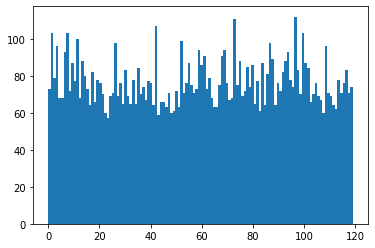

In [ ]:
plt.hist(y_train,bins=120) ##Get a histogram displaying how many images of each class our data has

As we can see the data is very scattered with some breeds having over a 100 images while others just around 60

# Data Augmentation

In order to add more data to our dataset to level out the images we can use Data Augmentation and the ImageData Generator in Tensor Flow

In [ ]:
##Setting the ImageDataGenerator
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3, ##Since its a float its a percentage to shift by
    height_shift_range=0.3,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest', ##Uses the closest pixel values to fill remaining spaces
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False, ##Wouldn't make sense to vertically flip a picture of a dog
    rescale=None,
)

In [ ]:
##Defining the transformation parameters that we will use later on
transform_parameters = {'theta': 20,
                        'tx': 2,
                        'ty': 0.3,
                        'zx': 0.9,
                        'zy': 0.9,
                        'flip_horizontal': True}

Initial Data Augmenter(Levels the data)

In [ ]:
##This loop goes through the labels and checks how many images we have for each breed
##If the amount of images is less than 120 it will augment an image of the same breed
##This augmentation process will adjusting images of the same breed until there are 115 images of that breed

for i in range(len(classNames)): ##Loops through 120 times for 120 diff classes
  for j in range(len(y_train)):  ##Has to go through the entire train dataset to find the images
    if list(y_train).count(i)>=115: ##Checks if that breed has more than 115 images already
      break
    if y_train[j]==i:   #Checks if the image matches the breed we are dealing with
      ##applies the data augmentation using the transform parameters previously defined
      img = data_gen.apply_transform(X_train[j],transform_parameters={'theta': 20,'tx': 2,'ty': 0.3,'zx': 0.9,'zy': 0.9,'flip_horizontal': True})
      ##Reshapes the augmented image to fit into the dataset
      img = np.reshape(img,(1,IMG_SIZE,IMG_SIZE,3))
      ##Adds new image to dataset
      X_train = np.concatenate((X_train,img))
      ##Adds corresponding label to dataset
      y_train = np.concatenate((y_train,[i]))
  print(f"Finished {i}") ## Used as a check to see how many breeds it has finished augmenting


Finished 0
Finished 1
Finished 2
Finished 3
Finished 4
Finished 5
Finished 6
Finished 7
Finished 8
Finished 9
Finished 10
Finished 11
Finished 12
Finished 13
Finished 14
Finished 15
Finished 16
Finished 17
Finished 18
Finished 19
Finished 20
Finished 21
Finished 22
Finished 23
Finished 24
Finished 25
Finished 26
Finished 27
Finished 28
Finished 29
Finished 30
Finished 31
Finished 32
Finished 33
Finished 34
Finished 35
Finished 36
Finished 37
Finished 38
Finished 39
Finished 40
Finished 41
Finished 42
Finished 43
Finished 44
Finished 45
Finished 46
Finished 47
Finished 48
Finished 49
Finished 50
Finished 51
Finished 52
Finished 53
Finished 54
Finished 55
Finished 56
Finished 57
Finished 58
Finished 59
Finished 60
Finished 61
Finished 62
Finished 63
Finished 64
Finished 65
Finished 66
Finished 67
Finished 68
Finished 69
Finished 70
Finished 71
Finished 72
Finished 73
Finished 74
Finished 75
Finished 76
Finished 77
Finished 78
Finished 79
Finished 80
Finished 81
Finished 82
Finished 83
Fi

In [ ]:
##Shape of the new Train Data
print(X_train.shape)
print(y_train.shape)

(13799, 128, 128, 3)
(13799,)


Visualize what the loop is doing to each image

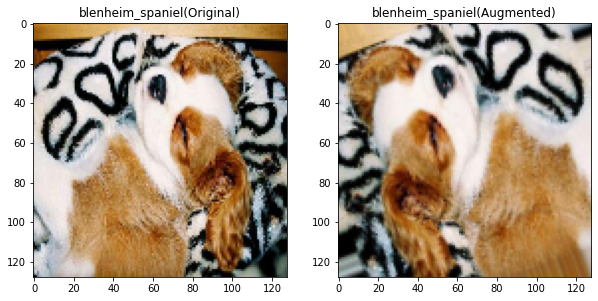

In [ ]:
##Visualize what the Augmenting function above is doing to each image it identifies as a match

plt.figure(figsize = (10, 10))

for i in range(2):
    plt.subplot(1, 2, i + 1)

    if i == 1:
      im = data_gen.apply_transform(X_train[1],transform_parameters=transform_parameters)
      plt.imshow(im,cmap=plt.cm.binary)
      plt.title(classNames[y_train[1]]+"(Augmented)")

    else:
      plt.title(classNames[y_train[1]]+"(Original)")
      plt.imshow(X_train[1], cmap = plt.cm.binary)

plt.show()



Essentially the images are flipped horizontally and then adjusted a little bit in terms of positioning as well as a slight zooming in on the image

# Visualize the Spread of the New Data

(array([115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 114., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115.]),
 array([  0.        ,   0.99166667,   1.98333333,   2.975     ,
          3.96666667,   4.95833333,   5.95      ,   6.94166667,
          7.93333333,   8.925     ,   9.91666667,  10.90833333

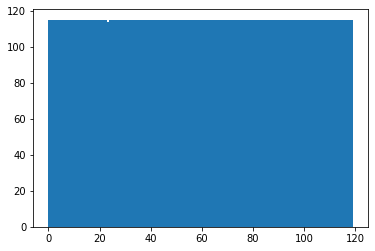

In [ ]:
##run the same function as before to see if anything has changed
plt.hist(y_train,bins=120)

As we can see the data is much better leveled now and we can pass it onto our model

# View an Image from the Finalized Train Data

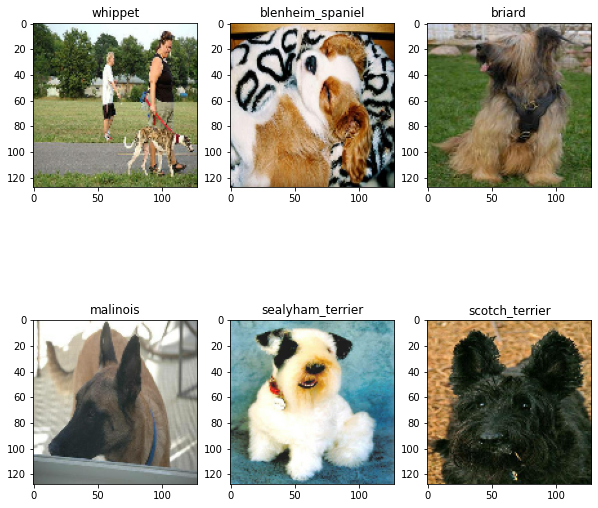

In [ ]:
##Make subplot to show 6 images
plt.figure(figsize = (10, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(classNames[y_train[i]])
    plt.imshow(X_train[i], cmap = plt.cm.binary)

plt.show()

# The Model

In [ ]:
##Selecting an advanced pretrained model from google to get general aspects that apply to all iamges
##For example it can identify certain patters such as a circle or a line, etc. which can later be used to differentiate between the breeds
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3),include_top=False,weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
##We don't want to change the parameters of this base model since they already do well
base_model.trainable = False

In [ ]:
##View the different layers of the Base Model
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

Compiling the Model

In [ ]:
##We now have to add our own layers to use the extracted features and figure out their importance(weights) when it comes to identifying the dog breed

model = tf.keras.Sequential() ##Using the Sequntial Model

model.add(base_model) ##Adds our Base Model Layer
model.add(layers.GlobalAveragePooling2D()) ##We add a global average pooling layer that also flattens out the data

model.add(layers.Dense(240, activation = "relu")) ##One hidden regular dense layer in between

model.add(layers.Dense(120, activation = "softmax")) ##Output layer



Viewing Summary of New Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 240)               307440    
                                                                 
 dense_1 (Dense)             (None, 120)               28920     
                                                                 
Total params: 2,594,344
Trainable params: 336,360
Non-trainable params: 2,257,984
_________________________________________________________________


Compile the Model

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = optim, loss = loss, metrics = ["accuracy"])

In [ ]:
##Declare amount of Epochs
epochs = 35

Fitting the Data into the Model

In [ ]:
##We use the .flow method to pass in batches the data to the model while also augmenting it in real time
model.fit(data_gen.flow(X_train, y_train), epochs = epochs, verbose = 1)


Epoch 1/35
432/432 [==============================] - 75s 143ms/step - loss: 2.9855 - accuracy: 0.2765
Epoch 2/35
432/432 [==============================] - 63s 145ms/step - loss: 2.1051 - accuracy: 0.4457
Epoch 3/35
432/432 [==============================] - 61s 142ms/step - loss: 1.9274 - accuracy: 0.4870
Epoch 4/35
432/432 [==============================] - 62s 143ms/step - loss: 1.8254 - accuracy: 0.5050
Epoch 5/35
432/432 [==============================] - 61s 142ms/step - loss: 1.7380 - accuracy: 0.5276
Epoch 6/35
432/432 [==============================] - 61s 142ms/step - loss: 1.6606 - accuracy: 0.5435
Epoch 7/35
432/432 [==============================] - 61s 142ms/step - loss: 1.6151 - accuracy: 0.5587
Epoch 8/35
432/432 [==============================] - 64s 149ms/step - loss: 1.5591 - accuracy: 0.5650
Epoch 9/35
432/432 [==============================] - 62s 144ms/step - loss: 1.5251 - accuracy: 0.5780
Epoch 10/35
432/432 [==============================] - 64s 148ms/step - l

Saving the Model

In [ ]:
model.save("Dog_Breed_Classifier_Model")

INFO:tensorflow:Assets written to: Dog_Breed_Classifier_Model/assets


INFO:tensorflow:Assets written to: Dog_Breed_Classifier_Model/assets


# Using our Model with Real Images

Your Image is a golden_retriever


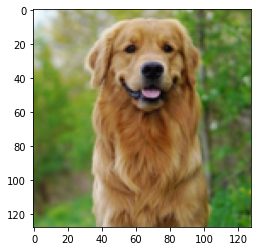

In [ ]:
from PIL import Image
image = Image.open("golden_retriever.jpeg")
image = image.resize((IMG_SIZE,IMG_SIZE))
image = np.array(image)
image = image/255.0

predictionArr = model.predict(np.reshape(image,(-1,IMG_SIZE,IMG_SIZE,3)))
index = np.argmax(predictionArr)
answer = classNames[index]

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)

In [ ]:
##Created this function to reduce the need for repition
def breedPredictor(image):
  image = image.resize((IMG_SIZE,IMG_SIZE))
  image = np.array(image)
  image = image/255.0

  predictionArr = model.predict(np.reshape(image,(-1,IMG_SIZE,IMG_SIZE,3)))
  index = np.argmax(predictionArr)
  answer = classNames[index]
  return answer

Correct Answer: German Shepard

Prediction - Your Image is a german_shepherd



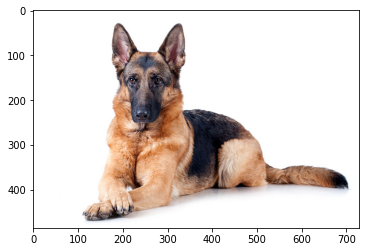

In [ ]:
from PIL import Image
image = Image.open("german.jpeg")

answer = breedPredictor(image)
print(f"Correct Answer: German Shepard\n")
print(f"Prediction - Your Image is a {answer}\n")
plt.imshow(image, cmap = plt.cm.binary)

Your Image is a chihuahua


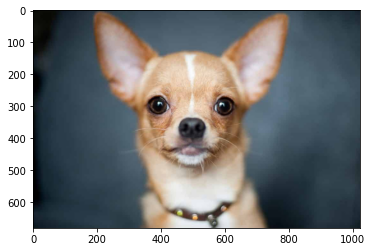

In [ ]:
from PIL import Image
image = Image.open("chihuahua.jpeg")
answer = breedPredictor(image)

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)

Your Image is a bernese_mountain_dog


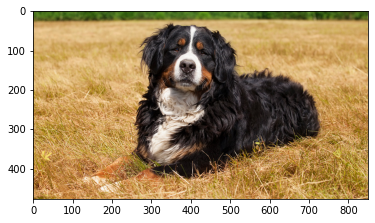

In [ ]:
from PIL import Image
image = Image.open("bernese.jpeg")
answer = breedPredictor(image)

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)

Your Image is a tibetan_mastiff


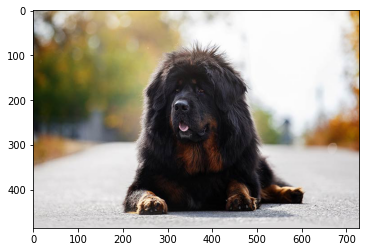

In [ ]:
from PIL import Image
image = Image.open("tibet.jpeg")
answer = breedPredictor(image)

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)

Your Image is a boston_bull


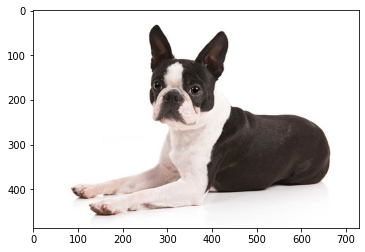

In [ ]:
from PIL import Image
image = Image.open("boston.jpeg")
answer = breedPredictor(image)

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)

Your Image is a great_dane


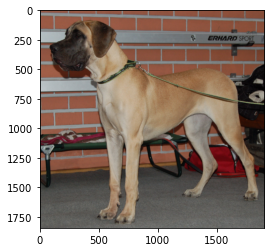

In [ ]:
from PIL import Image
image = Image.open("greatdane.jpeg")
answer = breedPredictor(image)

print(f"Your Image is a {answer}")
plt.imshow(image, cmap = plt.cm.binary)